<a href="https://colab.research.google.com/github/Gus-1003/ENEM_2021-Data_analysis/blob/main/natureQuest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Região 1 - Trabalhando com a Prova de Natureza

## Parte 0: Importando Bibliotecas e Lendo o Arquivo

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/

Mounted at /content/drive/
/content/drive/MyDrive


In [ ]:
# ler dados de interesse
dados = pd.read_csv('/content/drive/MyDrive/Pesquisa_Enem2021/Base de Dados/natureQuest.csv')

## Parte 1: Análise Descritiva

### Visualização dos dados Brutos:

In [ ]:
dados.head()

,Unnamed: 0,TP_SEXO,TP_COR_RACA,TP_ESCOLA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,CO_PROVA_CN,NU_NOTA_CN,TX_RESPOSTAS_CN
0,0,F,1,1,Nova Lima,MG,0,NaN,NaN,NaN
1,1,M,1,1,Maceió,AL,1,912.0,505.9,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE
2,2,F,1,1,Ferraz de Vasconcelos,SP,0,NaN,NaN,NaN
3,3,M,3,2,Crato,CE,1,911.0,580.7,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC
4,4,F,3,2,Acarape,CE,1,912.0,497.7,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   TP_SEXO             object 
 2   TP_COR_RACA         int64  
 3   TP_ESCOLA           int64  
 4   NO_MUNICIPIO_PROVA  object 
 5   SG_UF_PROVA         object 
 6   TP_PRESENCA_CN      int64  
 7   CO_PROVA_CN         float64
 8   NU_NOTA_CN          float64
 9   TX_RESPOSTAS_CN     object 
dtypes: float64(2), int64(4), object(4)
memory usage: 258.6+ MB


In [ ]:
dados.describe()

,Unnamed: 0,TP_COR_RACA,TP_ESCOLA,TP_PRESENCA_CN,CO_PROVA_CN,NU_NOTA_CN
count,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,2.245844e+06,2.245844e+06
mean,1.694916e+06,2.043491e+00,1.396214e+00,6.633786e-01,9.160518e+02,4.917857e+02
std,9.785604e+05,1.022561e+00,5.938455e-01,4.734579e-01,2.586309e+01,8.056676e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,9.090000e+02,0.000000e+00
25%,8.474578e+05,1.000000e+00,1.000000e+00,0.000000e+00,9.100000e+02,4.310000e+02
50%,1.694916e+06,2.000000e+00,1.000000e+00,1.000000e+00,9.110000e+02,4.820000e+02
75%,2.542373e+06,3.000000e+00,2.000000e+00,1.000000e+00,9.120000e+02,5.458000e+02
max,3.389831e+06,6.000000e+00,3.000000e+00,2.000000e+00,1.048000e+03,8.671000e+02


In [ ]:
dados.describe(include='object')

,TP_SEXO,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TX_RESPOSTAS_CN
count,3389832,3389832,3389832,2245844
unique,2,1712,27,2244621
top,F,São Paulo,SP,.............................................
freq,2090526,141840,509954,393


In [ ]:
dados.shape

(3389832, 10)

In [ ]:
# Desejo meu: usar a função isna de um jeito que ela mostre as colunas que tem mais que x valor de NAN
dados.isna().sum()

Unnamed: 0                  0
TP_SEXO                     0
TP_COR_RACA                 0
TP_ESCOLA                   0
NO_MUNICIPIO_PROVA          0
SG_UF_PROVA                 0
TP_PRESENCA_CN              0
CO_PROVA_CN           1143988
NU_NOTA_CN            1143988
TX_RESPOSTAS_CN       1143988
dtype: int64

### Remoção das linhas NAN:

In [ ]:
dados = dados.dropna(axis=0)

In [ ]:
dados.isna().sum()

Unnamed: 0            0
TP_SEXO               0
TP_COR_RACA           0
TP_ESCOLA             0
NO_MUNICIPIO_PROVA    0
SG_UF_PROVA           0
TP_PRESENCA_CN        0
CO_PROVA_CN           0
NU_NOTA_CN            0
TX_RESPOSTAS_CN       0
dtype: int64

In [ ]:
dados.head()

,Unnamed: 0,TP_SEXO,TP_COR_RACA,TP_ESCOLA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,CO_PROVA_CN,NU_NOTA_CN,TX_RESPOSTAS_CN
1,1,M,1,1,Maceió,AL,1,912.0,505.9,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE
3,3,M,3,2,Crato,CE,1,911.0,580.7,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC
4,4,F,3,2,Acarape,CE,1,912.0,497.7,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB
8,8,F,3,2,Belo Horizonte,MG,1,910.0,487.4,BBBDCCBDCCEDBBBCACEBCDADEEADCDEBEDDEBBEBEEECB
9,9,F,3,2,Ruy Barbosa,BA,1,909.0,507.6,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED


In [ ]:
dados.tail()

,Unnamed: 0,TP_SEXO,TP_COR_RACA,TP_ESCOLA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,CO_PROVA_CN,NU_NOTA_CN,TX_RESPOSTAS_CN
3389793,3389793,F,1,1,Mogi Guaçu,SP,1,1048.0,506.0,ADBDADACEEECECCBAAEDDEAADBEACEACBCCEDBAADCBED
3389807,3389807,M,3,1,Sete Lagoas,MG,1,1048.0,435.6,CBACACCDDEBBBEDECCAEDAEBEAEABBCDDBECADCACCDCD
3389814,3389814,M,1,1,Nilópolis,RJ,1,1045.0,576.9,BECEEEEDDCCAEEECDACBBCECDBBCDBBACCEBAACCCBEEA
3389815,3389815,F,3,1,Tonantins,AM,1,1045.0,449.9,DAADCEACDEAEDBACECAECBDCABDDCCABECDCAEDACDEED
3389830,3389830,F,1,1,Pouso Alegre,MG,1,1048.0,563.7,BDDCACBDEEACEBCDADBDABECCBABEAEBDCDCDBBCDBAAD


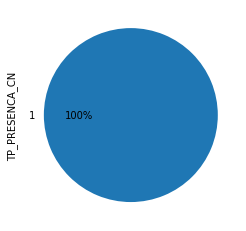

In [ ]:
dados['TP_PRESENCA_CN'].value_counts().head().plot.pie(autopct='%.0f%%')

In [ ]:
dados.drop('TP_PRESENCA_CN', axis=1, inplace=True)
dados.drop('Unnamed: 0', axis=1, inplace=True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2245844 entries, 1 to 3389830
Data columns (total 8 columns):
 #   Column              Dtype  
---  ------              -----  
 0   TP_SEXO             object 
 1   TP_COR_RACA         int64  
 2   TP_ESCOLA           int64  
 3   NO_MUNICIPIO_PROVA  object 
 4   SG_UF_PROVA         object 
 5   CO_PROVA_CN         float64
 6   NU_NOTA_CN          float64
 7   TX_RESPOSTAS_CN     object 
dtypes: float64(2), int64(2), object(4)
memory usage: 154.2+ MB


In [ ]:
dados.head()

,TP_SEXO,TP_COR_RACA,TP_ESCOLA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,CO_PROVA_CN,NU_NOTA_CN,TX_RESPOSTAS_CN
1,M,1,1,Maceió,AL,912.0,505.9,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE
3,M,3,2,Crato,CE,911.0,580.7,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC
4,F,3,2,Acarape,CE,912.0,497.7,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB
8,F,3,2,Belo Horizonte,MG,910.0,487.4,BBBDCCBDCCEDBBBCACEBCDADEEADCDEBEDDEBBEBEEECB
9,F,3,2,Ruy Barbosa,BA,909.0,507.6,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED


### Corrigindo numeração do index:

In [ ]:
dados = dados.reset_index(drop=True)

In [ ]:
display(dados)

,TP_SEXO,TP_COR_RACA,TP_ESCOLA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,CO_PROVA_CN,NU_NOTA_CN,TX_RESPOSTAS_CN
0,M,1,1,Maceió,AL,912.0,505.9,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE
1,M,3,2,Crato,CE,911.0,580.7,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC
2,F,3,2,Acarape,CE,912.0,497.7,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB
3,F,3,2,Belo Horizonte,MG,910.0,487.4,BBBDCCBDCCEDBBBCACEBCDADEEADCDEBEDDEBBEBEEECB
4,F,3,2,Ruy Barbosa,BA,909.0,507.6,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED
...,...,...,...,...,...,...,...,...
2245839,F,1,1,Mogi Guaçu,SP,1048.0,506.0,ADBDADACEEECECCBAAEDDEAADBEACEACBCCEDBAADCBED
2245840,M,3,1,Sete Lagoas,MG,1048.0,435.6,CBACACCDDEBBBEDECCAEDAEBEAEABBCDDBECADCACCDCD
2245841,M,1,1,Nilópolis,RJ,1045.0,576.9,BECEEEEDDCCAEEECDACBBCECDBBCDBBACCEBAACCCBEEA
2245842,F,3,1,Tonantins,AM,1045.0,449.9,DAADCEACDEAEDBACECAECBDCABDDCCABECDCAEDACDEED


## Parte 2: Trabalhando com o Gabarito


### Separando as respostas em colunas:

In [ ]:
dfResposta = dados[['NU_NOTA_CN', 'CO_PROVA_CN', 'TX_RESPOSTAS_CN']]
dfResposta

,NU_NOTA_CN,CO_PROVA_CN,TX_RESPOSTAS_CN
0,505.9,912.0,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE
1,580.7,911.0,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC
2,497.7,912.0,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB
3,487.4,910.0,BBBDCCBDCCEDBBBCACEBCDADEEADCDEBEDDEBBEBEEECB
4,507.6,909.0,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED
...,...,...,...
2245839,506.0,1048.0,ADBDADACEEECECCBAAEDDEAADBEACEACBCCEDBAADCBED
2245840,435.6,1048.0,CBACACCDDEBBBEDECCAEDAEBEAEABBCDDBECADCACCDCD
2245841,576.9,1045.0,BECEEEEDDCCAEEECDACBBCECDBBCDBBACCEBAACCCBEEA
2245842,449.9,1045.0,DAADCEACDEAEDBACECAECBDCABDDCCABECDCAEDACDEED


In [ ]:
questoes = []
for i, gabarito in enumerate(list(dados['TX_RESPOSTAS_CN'].loc[0:])):
  questoes.append(gabarito)

final = []
for i in range(45):
  final.append([aluno[i] for aluno in questoes])

In [ ]:
for i in range(45):
  dfResposta['q' + str(i)] = final[i]

<ipython-input-21-c8f85214181a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfResposta['q' + str(i)] = final[i]


In [ ]:
dfResposta

,NU_NOTA_CN,CO_PROVA_CN,TX_RESPOSTAS_CN,q0,q1,q2,q3,q4,q5,q6,...,q35,q36,q37,q38,q39,q40,q41,q42,q43,q44
0,505.9,912.0,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,D,C,B,C,C,B,D,...,D,C,C,C,B,B,C,A,D,E
1,580.7,911.0,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,C,C,A,B,B,D,A,...,A,B,C,E,A,B,A,E,B,C
2,497.7,912.0,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,B,A,B,C,D,C,C,...,D,E,C,C,A,E,D,B,C,B
3,487.4,910.0,BBBDCCBDCCEDBBBCACEBCDADEEADCDEBEDDEBBEBEEECB,B,B,B,D,C,C,B,...,E,B,B,E,B,E,E,E,C,B
4,507.6,909.0,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,B,A,E,D,E,B,D,...,E,C,B,C,C,D,A,B,E,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245839,506.0,1048.0,ADBDADACEEECECCBAAEDDEAADBEACEACBCCEDBAADCBED,A,D,B,D,A,D,A,...,E,D,B,A,A,D,C,B,E,D
2245840,435.6,1048.0,CBACACCDDEBBBEDECCAEDAEBEAEABBCDDBECADCACCDCD,C,B,A,C,A,C,C,...,C,A,D,C,A,C,C,D,C,D
2245841,576.9,1045.0,BECEEEEDDCCAEEECDACBBCECDBBCDBBACCEBAACCCBEEA,B,E,C,E,E,E,E,...,B,A,A,C,C,C,B,E,E,A
2245842,449.9,1045.0,DAADCEACDEAEDBACECAECBDCABDDCCABECDCAEDACDEED,D,A,A,D,C,E,A,...,C,A,E,D,A,C,D,E,E,D


In [ ]:
dfResposta.drop('TX_RESPOSTAS_CN', axis=1, inplace=True)

In [ ]:
# displaying data frame again - Output 2
dfResposta.head()

,NU_NOTA_CN,CO_PROVA_CN,q0,q1,q2,q3,q4,q5,q6,q7,...,q35,q36,q37,q38,q39,q40,q41,q42,q43,q44
0,505.9,912.0,D,C,B,C,C,B,D,B,...,D,C,C,C,B,B,C,A,D,E
1,580.7,911.0,C,C,A,B,B,D,A,E,...,A,B,C,E,A,B,A,E,B,C
2,497.7,912.0,B,A,B,C,D,C,C,B,...,D,E,C,C,A,E,D,B,C,B
3,487.4,910.0,B,B,B,D,C,C,B,D,...,E,B,B,E,B,E,E,E,C,B
4,507.6,909.0,B,A,E,D,E,B,D,E,...,E,C,B,C,C,D,A,B,E,D


### Tipos de Prova:

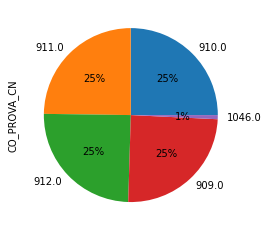

In [ ]:
dfResposta['CO_PROVA_CN'].value_counts().head().plot.pie(autopct='%.0f%%')

In [ ]:
dfResposta['CO_PROVA_CN'].value_counts()

910.0     540520
911.0     534778
912.0     534535
909.0     533925
1046.0     16489
1047.0     16228
1048.0     16174
1045.0     16083
1014.0      8623
1011.0      8585
1012.0      8514
1013.0      8474
917.0        874
990.0        449
992.0        431
989.0        430
991.0        421
916.0        311
Name: CO_PROVA_CN, dtype: int64

In [ ]:
#Using drop() to delete rows based on column value
dfResposta.drop(dfResposta[dfResposta['CO_PROVA_CN'] > 912].index, inplace = True)
dfResposta['CO_PROVA_CN'].value_counts()

910.0    540520
911.0    534778
912.0    534535
909.0    533925
Name: CO_PROVA_CN, dtype: int64

In [ ]:
dfResposta = dfResposta.reset_index(drop=True)
display(dfResposta)

,NU_NOTA_CN,CO_PROVA_CN,q0,q1,q2,q3,q4,q5,q6,q7,...,q35,q36,q37,q38,q39,q40,q41,q42,q43,q44
0,505.9,912.0,D,C,B,C,C,B,D,B,...,D,C,C,C,B,B,C,A,D,E
1,580.7,911.0,C,C,A,B,B,D,A,E,...,A,B,C,E,A,B,A,E,B,C
2,497.7,912.0,B,A,B,C,D,C,C,B,...,D,E,C,C,A,E,D,B,C,B
3,487.4,910.0,B,B,B,D,C,C,B,D,...,E,B,B,E,B,E,E,E,C,B
4,507.6,909.0,B,A,E,D,E,B,D,E,...,E,C,B,C,C,D,A,B,E,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143753,387.9,911.0,D,E,B,D,A,C,E,B,...,B,C,D,D,A,C,E,E,D,B
2143754,452.4,910.0,B,A,C,E,C,D,A,E,...,E,B,A,D,C,E,B,D,E,A
2143755,407.2,912.0,C,A,D,D,D,D,D,E,...,E,D,D,A,D,B,E,D,C,D
2143756,540.8,911.0,C,C,C,C,A,B,A,D,...,A,C,E,A,D,A,E,C,B,B


* 909	- Azul
* 910	- Amarela
* 911	- Cinza
* 912	- Rosa

In [117]:
prova1 = dfResposta[dfResposta.CO_PROVA_CN == 909.0] # azul
prova2 = dfResposta[dfResposta.CO_PROVA_CN == 910.0] # amarela
prova3 = dfResposta[dfResposta.CO_PROVA_CN == 911.0] # cinza
prova4 = dfResposta[dfResposta.CO_PROVA_CN == 912.0] # rosa 

In [118]:
display(prova1)

,NU_NOTA_CN,CO_PROVA_CN,q0,q1,q2,q3,q4,q5,q6,q7,...,q35,q36,q37,q38,q39,q40,q41,q42,q43,q44
4,507.6,909.0,B,A,E,D,E,B,D,E,...,E,C,B,C,C,D,A,B,E,D
5,650.9,909.0,E,C,E,C,A,B,E,C,...,C,C,D,B,C,D,A,C,A,D
11,388.1,909.0,D,C,A,C,D,D,A,C,...,C,A,C,C,D,C,C,B,C,E
14,521.0,909.0,B,A,C,B,D,C,D,C,...,D,C,C,B,B,D,A,B,C,D
16,531.9,909.0,E,B,E,D,A,E,E,A,...,B,E,C,D,C,C,D,D,D,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143735,488.0,909.0,D,A,D,C,E,B,A,C,...,*,C,E,B,B,D,B,A,C,E
2143742,523.6,909.0,B,D,E,B,B,C,B,D,...,A,C,D,D,C,C,B,B,C,A
2143743,411.3,909.0,B,A,E,B,A,E,C,E,...,C,B,A,D,A,B,A,B,D,B
2143744,540.0,909.0,E,E,E,C,D,D,B,A,...,D,C,B,C,C,B,A,A,C,D


In [119]:
display(prova4)

,NU_NOTA_CN,CO_PROVA_CN,q0,q1,q2,q3,q4,q5,q6,q7,...,q35,q36,q37,q38,q39,q40,q41,q42,q43,q44
0,505.9,912.0,D,C,B,C,C,B,D,B,...,D,C,C,C,B,B,C,A,D,E
2,497.7,912.0,B,A,B,C,D,C,C,B,...,D,E,C,C,A,E,D,B,C,B
10,509.6,912.0,C,C,E,B,D,B,D,B,...,B,C,D,C,E,B,E,C,A,B
13,439.6,912.0,B,C,E,D,E,A,C,A,...,D,C,C,A,B,B,D,C,C,A
15,426.2,912.0,A,D,D,B,E,A,B,A,...,D,E,C,D,A,A,C,B,C,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143728,482.0,912.0,D,D,D,C,A,C,B,B,...,A,C,B,C,C,B,D,B,C,D
2143733,380.9,912.0,C,D,A,B,D,E,A,C,...,B,A,D,D,B,E,A,D,A,E
2143734,388.8,912.0,C,A,C,D,E,E,D,A,...,D,E,C,E,A,B,C,C,B,D
2143748,516.3,912.0,D,A,*,B,D,B,D,B,...,E,C,C,E,D,B,C,E,A,D


In [122]:
# Pretendido: 2143758 rows
result_notas = prova1.NU_NOTA_CN.append([prova2.NU_NOTA_CN])
result_notas = result_notas.append([prova3.NU_NOTA_CN])
result_notas = result_notas.append([prova4.NU_NOTA_CN])
#result_notas.describe()
display(result_notas)

4          507.6
5          650.9
11         388.1
14         521.0
16         531.9
           ...  
2143728    482.0
2143733    380.9
2143734    388.8
2143748    516.3
2143755    407.2
Name: NU_NOTA_CN, Length: 2143758, dtype: float64

In [123]:
# amarela.nota].append(az) 

# # Questão 1 - 5
# amarela[q0].append(azul.q1[x], azul[q1], azul[q1])
# amarela[q1].append(azul.q1[x], azul[q1], azul[q1])
# amarela[q2].append(azul.q1[x], azul[q1], azul[q1])
# amarela[q3].append(azul.q1[x], azul[q1], azul[q1])
# amarela[q4].append(azul.q1[x], azul[q1], azul[q1])

# Questão 6 - 10

# Questão 11 - 15

# Questão 16 - 20

# Questão 21 - 25

# Questão 26 - 30

# Questão 31 - 35

# Questão 46 - 40

# Questão 40 - 45

In [124]:
prova1.describe()

,NU_NOTA_CN,CO_PROVA_CN
count,533925.000000,533925.0
mean,490.943839,909.0
std,81.623255,0.0
min,0.000000,909.0
25%,429.000000,909.0
50%,480.400000,909.0
75%,546.000000,909.0
max,856.600000,909.0


In [125]:
prova1.describe(include='object')

,q0,q1,q2,q3,q4,q5,q6,q7,q8,q9,...,q35,q36,q37,q38,q39,q40,q41,q42,q43,q44
count,533925,533925,533925,533925,533925,533925,533925,533925,533925,533925,...,533925,533925,533925,533925,533925,533925,533925,533925,533925,533925
unique,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
top,B,C,E,D,A,B,E,E,A,B,...,D,C,C,C,D,B,A,B,E,A
freq,164275,151396,182338,154589,165848,209149,197658,161411,288339,185126,...,190233,335198,211351,170672,159273,201784,224575,183156,154888,164032


In [126]:
count = prova1['q0'].value_counts()
print(count)

B    164275
E    125200
A    124524
D     72030
C     46496
.      1251
*       149
Name: q0, dtype: int64


In [127]:
print(prova1.q0)

4          B
5          E
11         D
14         B
16         E
          ..
2143735    D
2143742    B
2143743    B
2143744    E
2143745    B
Name: q0, Length: 533925, dtype: object


### Correção:

Prova Base: Amarela - Prova 1

In [128]:
gabarito = ["A", "D", "C", "D", "C", "D", "B", "B", "B", "E", "C", "D", "C", "C", "D", "C", "B", "C", "B", "D", "A", "B", "C", "A", "A", "D", "C", "B", "E", "B",
         "A", "B", "E", "E", "B", "B", "B", "C", "A", "B", "E", "D", "E", "D", "E"]

In [129]:
print(gabarito[0])

A


In [130]:
# def convert(resposta):
#   if resposta == "A":
#     resp =1
#   elif resposta == "B":
#     resp =2
#   elif resposta == "C":
#     resp =3
#   elif resposta == "D":
#     resp =4
#   elif resposta == "E":
#     resp =5
#   else:
#     resp =0
#   return resp

In [131]:
# for i in range(45):
#   dfResposta['q' + str(i)]

# questoes = []

# for i, gabarito in enumerate(list(dados['TX_RESPOSTAS_CN'].loc[0:])):

#   respostas = []

#   for j, resposta in enumerate(gabarito):
#     respostas.append(convert(resposta))
#   questoes.append(respostas)

# final = []
# for i in range(45):
#   final.append([aluno[i] for aluno in questoes])

## Extra: Salvando arquivo dos dados pré processados:

In [ ]:
#natureQuestPreP_csv = dfResposta.to_csv('/content/drive/MyDrive/Pesquisa_Dados_Enem2021/Base de Dados/natureQuestPreP.csv')